# ***ANÁLISE DE DADOS DE PREÇOS DE ALUGUEL EM SÃO PAULO***

## Objeto em análise:
> Base de dados fornecida pela Alura (em parceria com o Grupo Boticário) sobre os preços de aluguéis em São Paulo em formato csv. 

## Objetivos:
> Explorar todos os dados oferecidos e observar as possíveis relações entre as variáveis, com intuito de ao final tirar conclusões relevantes do cenário de preços do Estado de São Paulo. 

## Dados:
> Os dados fornecidos envolve:

. Endereço = endereço do imóvel <br/>
. Bairro = bairro localizado o imóvel<br/>
. Área = área em metros quadrados do imóvel<br/>
. Banheiros = número de banheiros<br/>
. Garagem = número de quantidade de vagas<br/>
. Tipo = tipo de imóvel: casa, apartamento, casa em condomínio, studio e kitnet<br/>
. Aluguel = valor do aluguel<br/>
. Total = total do aluguel somando os adicionais (IPTU, condomínio, dentre outros)


## Exploração de dados:
> Inicialmente, faremos a importação dos dados. Posteriormente, procederemos com a limpeza e o tratamento dos dados. Após essa etapa, realizaremos uma análise descritiva seguida da modelagem de regressão linear. Por fim, criaremos visualizações dos dados para concluir a análise com base nos resultados obtidos. 

------

# ***Análise de dados***

In [1]:
# Importando as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

## *1. Importação dos dados*

In [2]:
df = pd.read_csv('base-alugueis-sp.csv')
df.head()

,address,district,area,bedrooms,garage,type,rent,total
0,Rua Herval,Belenzinho,21,1,0,Studio e kitnet,2400,2939
1,Avenida São Miguel,Vila Marieta,15,1,1,Studio e kitnet,1030,1345
2,Rua Oscar Freire,Pinheiros,18,1,0,Apartamento,4000,4661
3,Rua Júlio Sayago,Vila Ré,56,2,2,Casa em condomínio,1750,1954
4,Rua Barata Ribeiro,Bela Vista,19,1,0,Studio e kitnet,4000,4654


In [3]:
# Renomeando as colunas para português
df = df.rename(columns={'address': 'Endereço', 'district': 'Bairro', 'area': 'Área', 'bedrooms': 'Banheiros', 'garage': 'Garagem', 'type': 'Tipo', 'rent': 'Aluguel', 'total': 'Total'})
df

,Endereço,Bairro,Área,Banheiros,Garagem,Tipo,Aluguel,Total
0,Rua Herval,Belenzinho,21,1,0,Studio e kitnet,2400,2939
1,Avenida São Miguel,Vila Marieta,15,1,1,Studio e kitnet,1030,1345
2,Rua Oscar Freire,Pinheiros,18,1,0,Apartamento,4000,4661
3,Rua Júlio Sayago,Vila Ré,56,2,2,Casa em condomínio,1750,1954
4,Rua Barata Ribeiro,Bela Vista,19,1,0,Studio e kitnet,4000,4654
...,...,...,...,...,...,...,...,...
11652,Avenida Adolfo Pinheiro,Santo Amaro,94,2,1,Apartamento,4100,5778
11653,Rua Professor Alexandre Correia,Jardim Vitória Régia,350,4,4,Apartamento,11250,17480
11654,Rua Abílio Borin,Jardim Caravelas,84,1,2,Apartamento,4500,5467
11655,Rua Forte William,Jardim Fonte do Morumbi,76,1,0,Apartamento,9000,10200


## *2. Limpeza de dados*

In [4]:
# Verificando se existem dados ausentes
df.isnull().sum()

Endereço     0
Bairro       0
Área         0
Banheiros    0
Garagem      0
Tipo         0
Aluguel      0
Total        0
dtype: int64

> Podemos perceber que os dados fornecidos não apresentam dados ausentes.

In [5]:
# Verificando os tipos das variáveis em análise
df.dtypes

Endereço     object
Bairro       object
Área          int64
Banheiros     int64
Garagem       int64
Tipo         object
Aluguel       int64
Total         int64
dtype: object

In [6]:
# Converter colunas para tipos numéricos, se necessário
df['Área'] = pd.to_numeric(df['Área'], errors='coerce')
df['Banheiros'] = pd.to_numeric(df['Banheiros'], errors='coerce')
df['Garagem'] = pd.to_numeric(df['Garagem'], errors='coerce')
df['Aluguel'] = pd.to_numeric(df['Aluguel'], errors='coerce')

## *3. Análise descritiva*

In [7]:
#Estatísticas descritivas
df.describe()

,Área,Banheiros,Garagem,Aluguel,Total
count,11657.000000,11657.000000,11657.000000,11657.000000,11657.000000
mean,84.655658,1.966286,1.060393,3250.814789,4080.030625
std,74.020536,0.931313,1.132349,2650.711557,3352.480274
min,0.000000,0.000000,0.000000,500.000000,509.000000
25%,40.000000,1.000000,0.000000,1590.000000,1996.000000
50%,60.000000,2.000000,1.000000,2415.000000,3057.000000
75%,96.000000,3.000000,2.000000,3800.000000,4774.000000
max,580.000000,6.000000,6.000000,25000.000000,28700.000000


In [8]:
# Observendo o min da tabela anterior percebemos que existe a possibilidade de haver imóveis com área zero, provavelmente por erro no momento do cadastro. 
# Descobrindo se existem tais imóveis

area_zero = (df['Área']==0).sum()
area_zero

2

In [10]:
# Eliminando valores nulos
df_sem_nulos = df.dropna()

C:\Users\milla\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


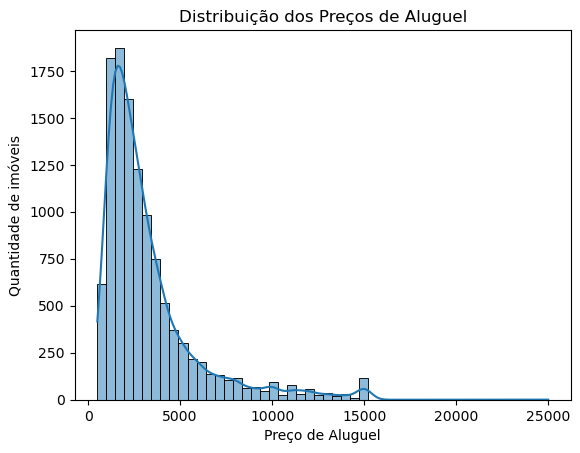

In [11]:
# Analisando as tendências e distribuições do preço do aluguel
sns.histplot(df['Aluguel'], bins=50, kde=True)
plt.title('Distribuição dos Preços de Aluguel')
plt.xlabel('Preço de Aluguel')
plt.ylabel('Quantidade de imóveis')
plt.show()

## *4. Visualização de dados*

C:\Users\milla\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\milla\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\milla\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\milla\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

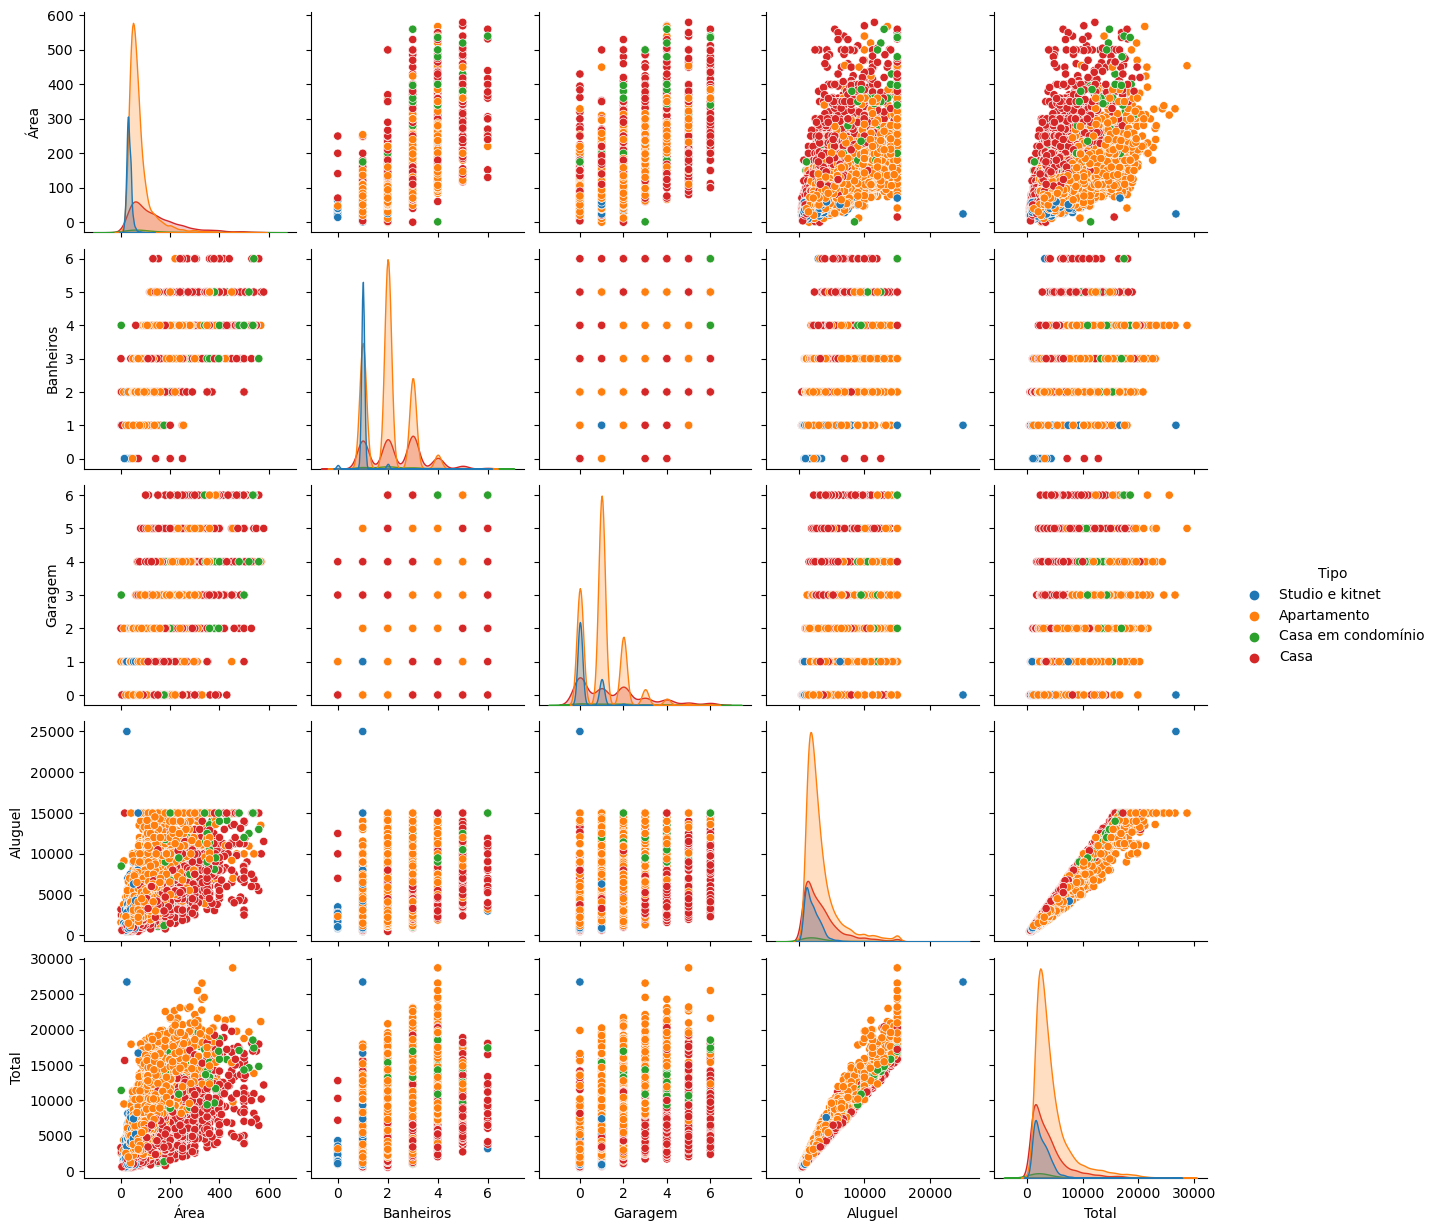

In [24]:
sns.pairplot(df, hue="Tipo")

### ***Analisando algumas correlações entre as variáveis***

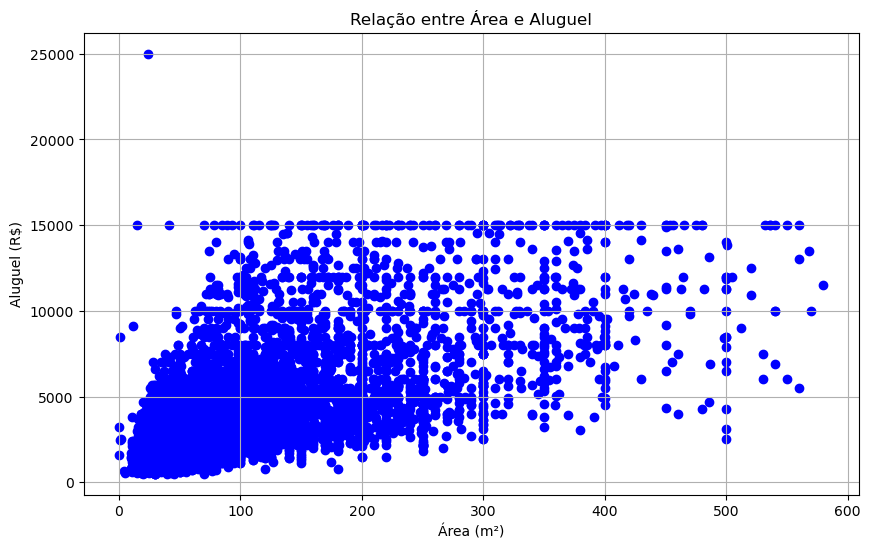

In [25]:
# Ccorrelação de aluguel e área

plt.figure(figsize=(10, 6))  
plt.scatter(df['Área'], df['Aluguel'], color='blue', marker='o')  # Gráfico de dispersão

# Adicionando título e rótulos aos eixos
plt.title('Relação entre Área e Aluguel')
plt.xlabel('Área (m²)')
plt.ylabel('Aluguel (R$)')


plt.grid(True)
plt.show()

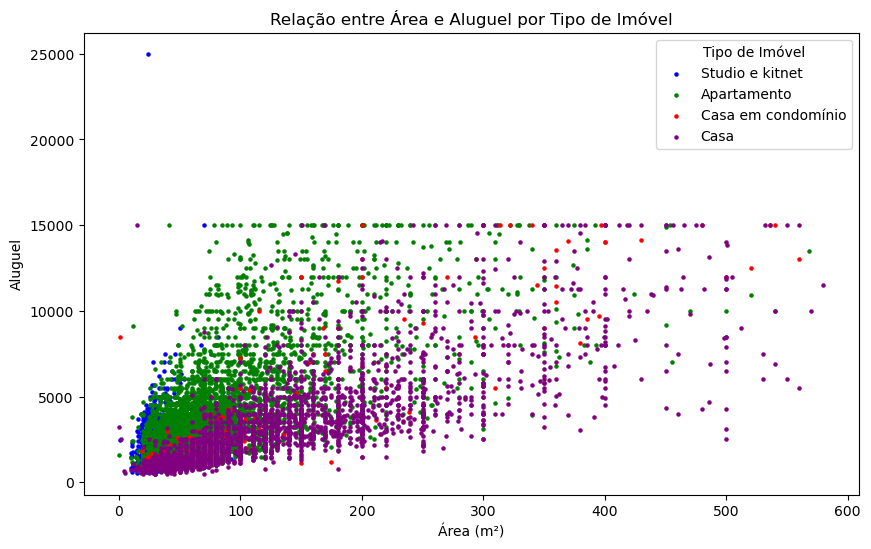

In [26]:
plt.figure(figsize=(10, 6))

tipos_imovel = df['Tipo'].unique()
cores = ['blue', 'green', 'red', 'purple', 'orange']  

for i, tipo in enumerate(tipos_imovel):
    subset = df[df['Tipo'] == tipo]
    plt.scatter(subset['Área'], subset['Aluguel'], color=cores[i % len(cores)], label=tipo, s=5)

plt.xlabel('Área (m²)')
plt.ylabel('Aluguel')
plt.title('Relação entre Área e Aluguel por Tipo de Imóvel')
plt.legend(title='Tipo de Imóvel')
plt.show()

<Axes: xlabel='Área'>

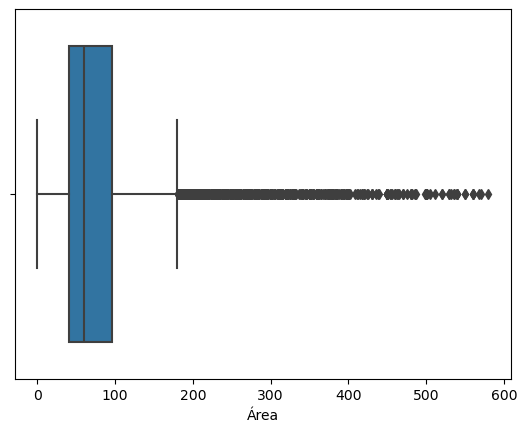

In [27]:
sns.boxplot(x=df['Área'])

In [28]:
# Identificando outliers
q1 = df['Área'].quantile(0.25)
q3 = df['Área'].quantile(0.75)
iqr = q3 - q1


limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

# Eliminando os outliers
df_clean = df[~((df['Área'] < limite_inferior) | (df['Área'] > limite_superior))]
df_clean


,Endereço,Bairro,Área,Banheiros,Garagem,Tipo,Aluguel,Total
0,Rua Herval,Belenzinho,21,1,0,Studio e kitnet,2400,2939
1,Avenida São Miguel,Vila Marieta,15,1,1,Studio e kitnet,1030,1345
2,Rua Oscar Freire,Pinheiros,18,1,0,Apartamento,4000,4661
3,Rua Júlio Sayago,Vila Ré,56,2,2,Casa em condomínio,1750,1954
4,Rua Barata Ribeiro,Bela Vista,19,1,0,Studio e kitnet,4000,4654
...,...,...,...,...,...,...,...,...
11651,São José,Alto da Boa Vista,158,4,2,Apartamento,6500,8929
11652,Avenida Adolfo Pinheiro,Santo Amaro,94,2,1,Apartamento,4100,5778
11654,Rua Abílio Borin,Jardim Caravelas,84,1,2,Apartamento,4500,5467
11655,Rua Forte William,Jardim Fonte do Morumbi,76,1,0,Apartamento,9000,10200


<Axes: xlabel='Aluguel'>

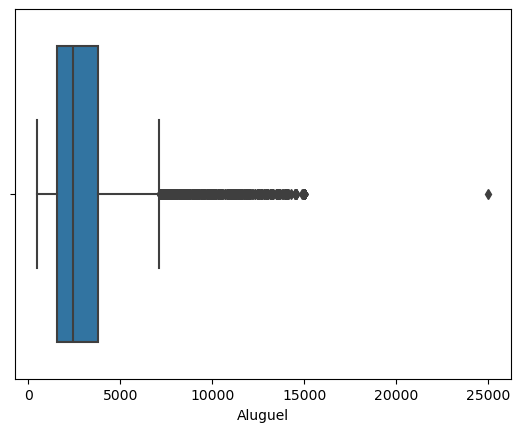

In [29]:
sns.boxplot(x=df['Aluguel'])

In [30]:
# Identificando outliers
q1 = df['Aluguel'].quantile(0.25)
q3 = df['Aluguel'].quantile(0.75)
iqr = q3 - q1


limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

# Eliminando os outliers
df_clean = df[~((df['Aluguel'] < limite_inferior) | (df['Aluguel'] > limite_superior))]
df_clean


,Endereço,Bairro,Área,Banheiros,Garagem,Tipo,Aluguel,Total
0,Rua Herval,Belenzinho,21,1,0,Studio e kitnet,2400,2939
1,Avenida São Miguel,Vila Marieta,15,1,1,Studio e kitnet,1030,1345
2,Rua Oscar Freire,Pinheiros,18,1,0,Apartamento,4000,4661
3,Rua Júlio Sayago,Vila Ré,56,2,2,Casa em condomínio,1750,1954
4,Rua Barata Ribeiro,Bela Vista,19,1,0,Studio e kitnet,4000,4654
...,...,...,...,...,...,...,...,...
11646,Rua Domingos Antonio Ciccone,Santo Amaro,180,4,2,Casa,4700,5264
11651,São José,Alto da Boa Vista,158,4,2,Apartamento,6500,8929
11652,Avenida Adolfo Pinheiro,Santo Amaro,94,2,1,Apartamento,4100,5778
11654,Rua Abílio Borin,Jardim Caravelas,84,1,2,Apartamento,4500,5467


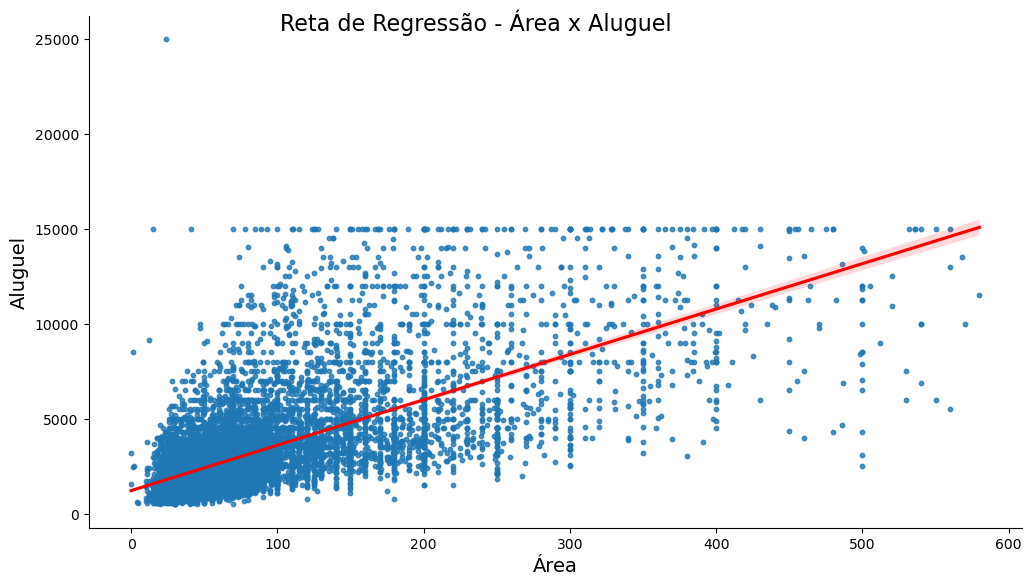

In [22]:
ax = sns.lmplot(x="Área", y="Aluguel", data=df, line_kws={'color': 'red'}, scatter_kws={'s': 10})
ax.fig.set_size_inches(12, 6)
ax.fig.suptitle('Reta de Regressão - Área x Aluguel', fontsize=16,)
ax.set_ylabels("Aluguel", fontsize=14)
ax.set_xlabels("Área", fontsize=14)
ax

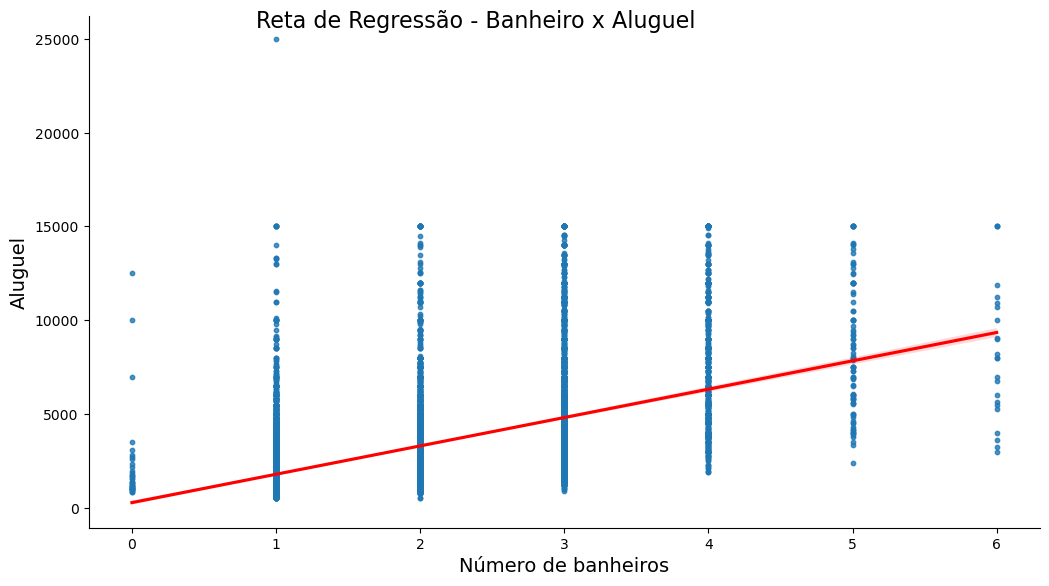

In [31]:
# Correlação entre o número de banheiros e aluguel
ax = sns.lmplot(x="Banheiros", y="Aluguel", data=df, line_kws={'color': 'red'}, scatter_kws={'s': 10})
ax.fig.set_size_inches(12, 6)
ax.fig.suptitle('Reta de Regressão - Banheiro x Aluguel', fontsize=16,)
ax.set_ylabels("Aluguel", fontsize=14)
ax.set_xlabels("Número de banheiros", fontsize=14)

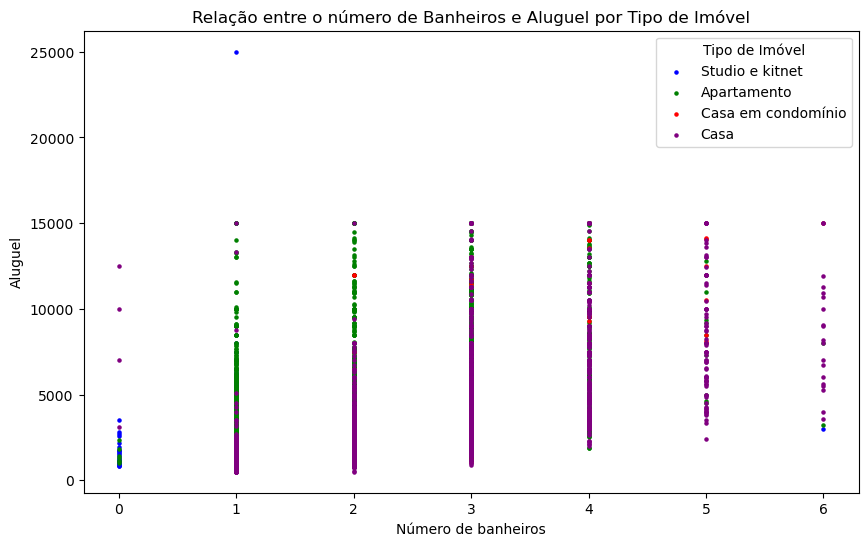

In [32]:
plt.figure(figsize=(10, 6))

tipos_imovel = df['Tipo'].unique()
cores = ['blue', 'green', 'red', 'purple', 'orange']  

for i, tipo in enumerate(tipos_imovel):
    subset = df[df['Tipo'] == tipo]
    plt.scatter(subset['Banheiros'], subset['Aluguel'], color=cores[i % len(cores)], label=tipo, s=5)

plt.xlabel('Número de banheiros')
plt.ylabel('Aluguel')
plt.title('Relação entre o número de Banheiros e Aluguel por Tipo de Imóvel')
plt.legend(title='Tipo de Imóvel')
plt.show()

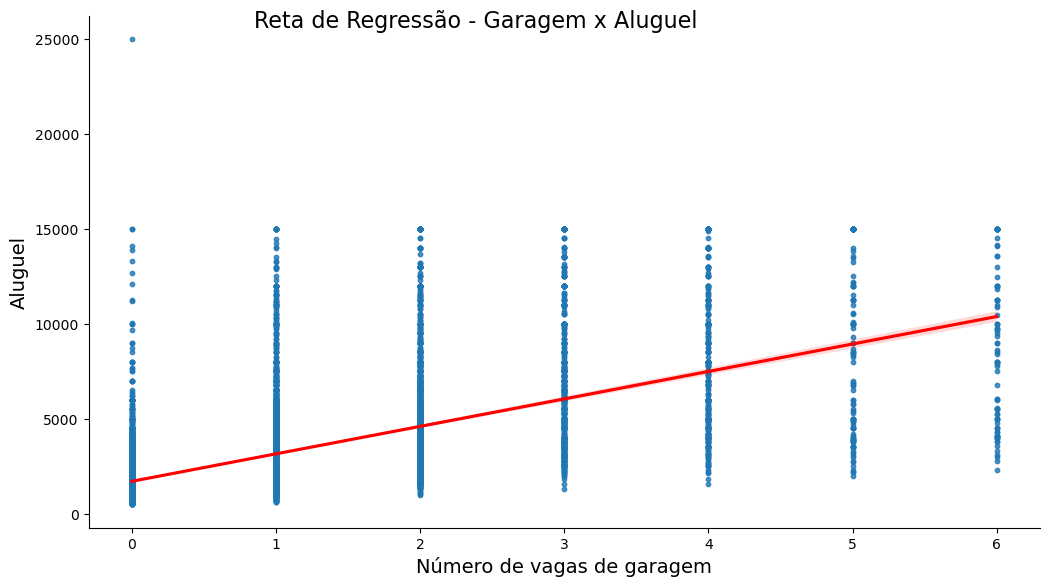

In [33]:
# Correlação entre o número de vagas na garagem e o aluguel
ax = sns.lmplot(x="Garagem", y="Aluguel", data=df, line_kws={'color': 'red'}, scatter_kws={'s': 10})
ax.fig.set_size_inches(12, 6)
ax.fig.suptitle('Reta de Regressão - Garagem x Aluguel', fontsize=16,)
ax.set_ylabels("Aluguel", fontsize=14)
ax.set_xlabels("Número de vagas de garagem", fontsize=14)

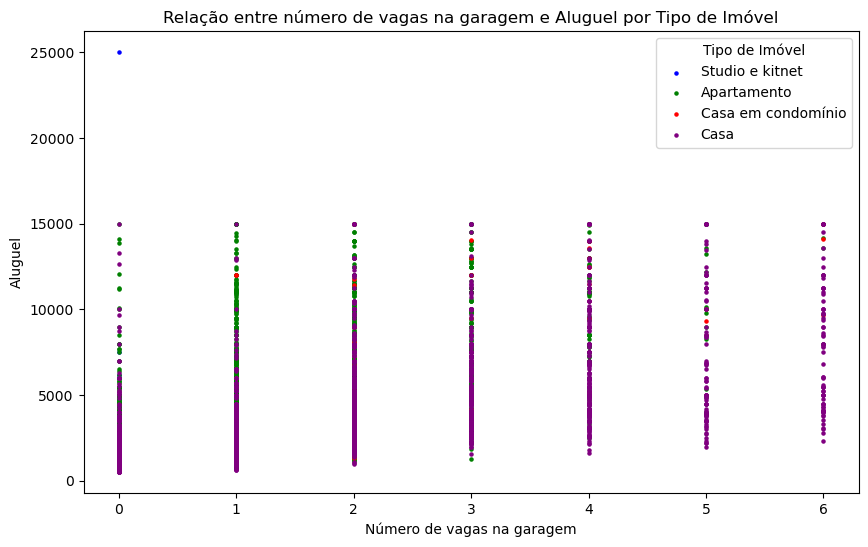

In [34]:
plt.figure(figsize=(10, 6))

tipos_imovel = df['Tipo'].unique()
cores = ['blue', 'green', 'red', 'purple', 'orange']  

for i, tipo in enumerate(tipos_imovel):
    subset = df[df['Tipo'] == tipo]
    plt.scatter(subset['Garagem'], subset['Aluguel'], color=cores[i % len(cores)], label=tipo, s=5)

plt.xlabel('Número de vagas na garagem')
plt.ylabel('Aluguel')
plt.title('Relação entre número de vagas na garagem e Aluguel por Tipo de Imóvel')
plt.legend(title='Tipo de Imóvel')
plt.show()

<Axes: xlabel='Total'>

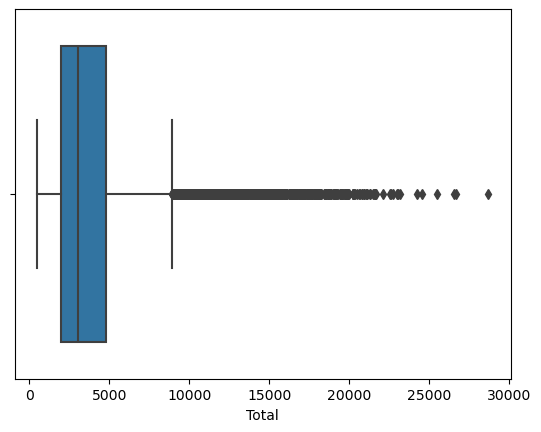

In [35]:
sns.boxplot(x=df['Total'])

In [37]:
# Identificando outliers
q1 = df['Total'].quantile(0.25)
q3 = df['Total'].quantile(0.75)
iqr = q3 - q1


limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

# Eliminando os outliers
df_clean = df[~((df['Total'] < limite_inferior) | (df['Total'] > limite_superior))]
df_clean

,Endereço,Bairro,Área,Banheiros,Garagem,Tipo,Aluguel,Total
0,Rua Herval,Belenzinho,21,1,0,Studio e kitnet,2400,2939
1,Avenida São Miguel,Vila Marieta,15,1,1,Studio e kitnet,1030,1345
2,Rua Oscar Freire,Pinheiros,18,1,0,Apartamento,4000,4661
3,Rua Júlio Sayago,Vila Ré,56,2,2,Casa em condomínio,1750,1954
4,Rua Barata Ribeiro,Bela Vista,19,1,0,Studio e kitnet,4000,4654
...,...,...,...,...,...,...,...,...
11646,Rua Domingos Antonio Ciccone,Santo Amaro,180,4,2,Casa,4700,5264
11651,São José,Alto da Boa Vista,158,4,2,Apartamento,6500,8929
11652,Avenida Adolfo Pinheiro,Santo Amaro,94,2,1,Apartamento,4100,5778
11654,Rua Abílio Borin,Jardim Caravelas,84,1,2,Apartamento,4500,5467


## ***Com intuito de facilitar a análise, faremos um agrupamento dos tipos de aluguéis.***

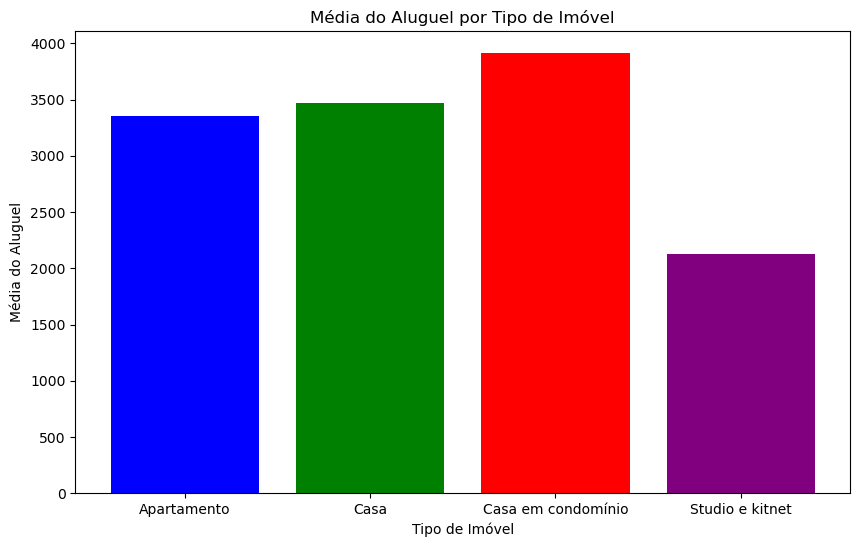

In [40]:
# Média do aluguel x Tipos de aluguel
grupo_aluguel = df.groupby('Tipo')['Aluguel'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(grupo_aluguel['Tipo'], grupo_aluguel['Aluguel'], color=['blue', 'green', 'red', 'purple', 'orange'])
plt.xlabel('Tipo de Imóvel')
plt.ylabel('Média do Aluguel')
plt.title('Média do Aluguel por Tipo de Imóvel')
plt.show()

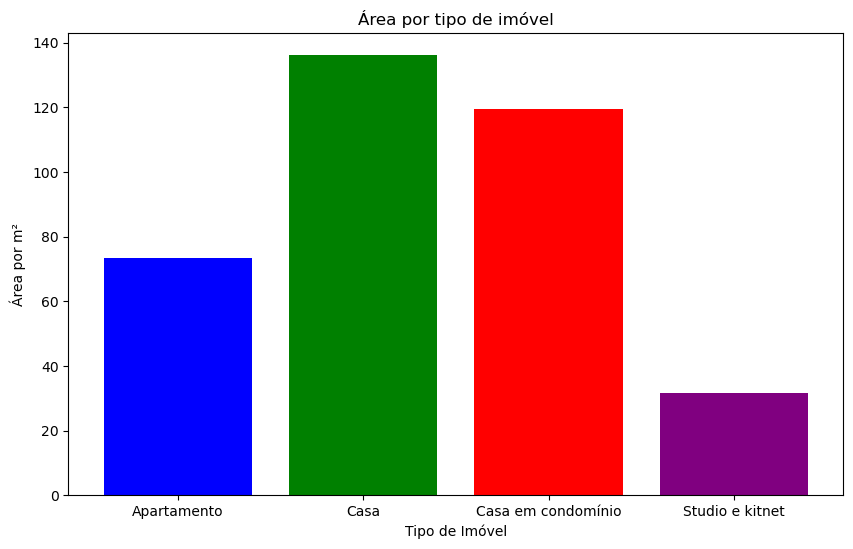

In [62]:
# Média do aluguel x Área
grupo_aluguel = df.groupby('Tipo')['Área'].mean().reset_index()

# Plotar gráfico de barras mostrando a média do aluguel por tipo de imóvel
plt.figure(figsize=(10, 6))
plt.bar(grupo_aluguel['Tipo'], grupo_aluguel['Área'], color=['blue', 'green', 'red', 'purple', 'orange'])
plt.xlabel('Tipo de Imóvel')
plt.ylabel('Área por m²')
plt.title('Área por tipo de imóvel')
plt.show()

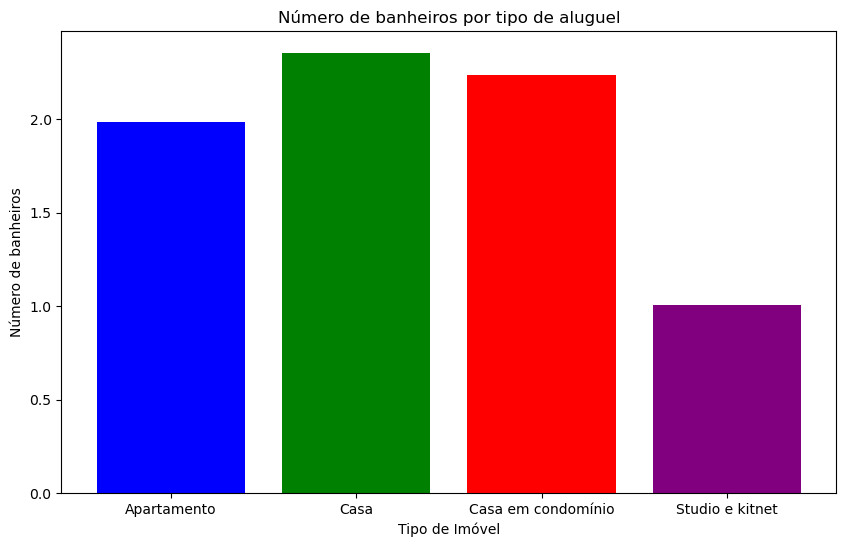

In [63]:
# Média do aluguel x Número de banheiros
grupo_aluguel = df.groupby('Tipo')['Banheiros'].mean().reset_index()

# Plotar gráfico de barras mostrando a média do aluguel por tipo de imóvel
plt.figure(figsize=(10, 6))
plt.bar(grupo_aluguel['Tipo'], grupo_aluguel['Banheiros'], color=['blue', 'green', 'red', 'purple', 'orange'])
plt.xlabel('Tipo de Imóvel')
plt.ylabel('Número de banheiros')
plt.title('Número de banheiros por tipo de aluguel')
plt.show()

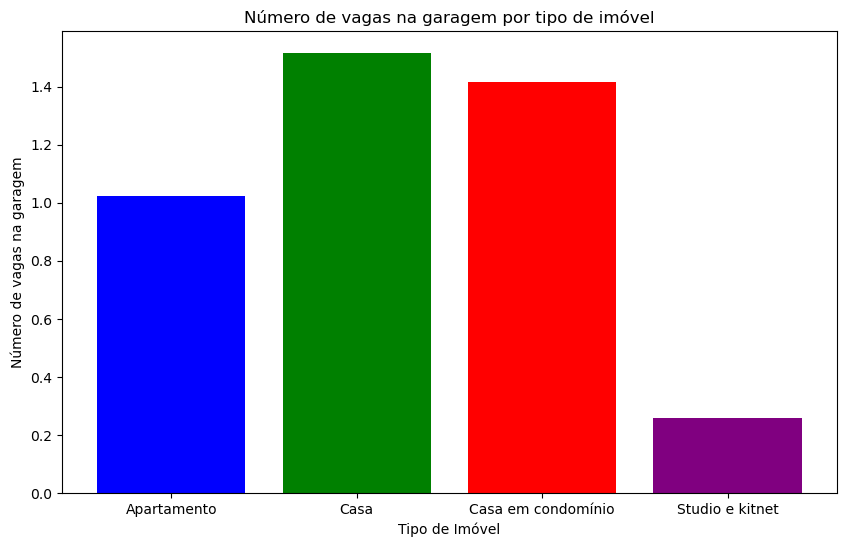

In [64]:
# Média do aluguel x Número de vagas na garagem
grupo_aluguel = df.groupby('Tipo')['Garagem'].mean().reset_index()

# Plotar gráfico de barras mostrando a média do aluguel por tipo de imóvel
plt.figure(figsize=(10, 6))
plt.bar(grupo_aluguel['Tipo'], grupo_aluguel['Garagem'], color=['blue', 'green', 'red', 'purple', 'orange'])
plt.xlabel('Tipo de Imóvel')
plt.ylabel('Número de vagas na garagem')
plt.title('Número de vagas na garagem por tipo de imóvel')
plt.show()

## ***Outras análises***

In [65]:
# Calculando a média dos maiores aluguéis por bairro
media_por_bairro = df.groupby('Bairro')['Aluguel'].mean().reset_index()
media_por_bairro = media_por_bairro.sort_values(by='Aluguel', ascending=False)

maiores_alugueis = media_por_bairro.head(10)
media_por_bairro.set_index('Bairro', inplace=True)

maiores_alugueis

,Bairro,Aluguel
475,Jardim Tango,15000.000000
8,Alphaville Residencial Dois,15000.000000
9,Alphaville Residencial Plus,15000.000000
689,Residencial Cinco (alphaville),13600.000000
10,Alphaville Residencial Um,13500.000000
101,Cidade Jardim,13000.000000
577,Pacaembu,12054.000000
82,Chácara Meyer,12000.000000
70,Centro Empresarial Tamboré,11833.333333
505,Jardim Vitoria Regia (zona Oeste),11820.000000


In [66]:
# Calculando a média dos maiioers aluguéis por bairro
media_por_bairro = df.groupby('Bairro')['Aluguel'].mean().reset_index()
media_por_bairro = media_por_bairro.sort_values(by='Aluguel')

menores_alugueis = media_por_bairro.head(10)
media_por_bairro.set_index('Bairro', inplace=True)

menores_alugueis

,Bairro,Aluguel
306,Jardim Jaçanã,500.0
293,Jardim Inga,600.0
274,Jardim Frei Galvão,629.0
331,Jardim Maraba,630.0
959,Vila Lais,660.0
836,Vila Cardoso Franco,700.5
1083,Vila Ramos,710.0
1151,Vila São Luís,740.0
735,Sítio do Piqueri,750.0
495,Jardim Vergueiro,759.0


In [67]:
# Quantidade de imóvveis para alugar por bairro
alugueis_por_bairro = df.groupby('Bairro').size().reset_index(name='Quantidade').sort_values(by='Quantidade', ascending=False)
alugueis_por_bairro.head(5)

,Bairro,Quantidade
26,Bela Vista,352
982,Vila Mariana,232
384,Jardim Paulista,220
67,Centro,178
668,Pinheiros,159


In [68]:
# Descobrindo qual o tipo de imóvel mais alugado por bairro
contagem_tipo_por_bairro = df.groupby(['Bairro', 'Tipo']).size().reset_index(name='contagem')
idx = contagem_tipo_por_bairro.groupby(['Bairro'])['contagem'].transform(max) == contagem_tipo_por_bairro['contagem']
tipo_mais_alugado_por_bairro = contagem_tipo_por_bairro[idx]
tipo_mais_alugado_por_bairro = tipo_mais_alugado_por_bairro.sort_values(by=[ 'contagem'], ascending=[False])
tipo_mais_alugado_por_bairro.head(20)

C:\Users\milla\AppData\Local\Temp\ipykernel_16004\4201787485.py:3: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  idx = contagem_tipo_por_bairro.groupby(['Bairro'])['contagem'].transform(max) == contagem_tipo_por_bairro['contagem']


,Bairro,Tipo,contagem
48,Bela Vista,Apartamento,228
652,Jardim Paulista,Apartamento,192
1729,Vila Mariana,Apartamento,149
1129,Pinheiros,Apartamento,124
1324,Vila Andrade,Apartamento,122
148,Cerqueira César,Apartamento,122
138,Centro,Apartamento,114
82,Brás,Apartamento,114
1204,Santana,Apartamento,112
255,Consolação,Apartamento,110


In [69]:
# Total de aluguéis por tipo
total_alugueis_por_tipo = df.groupby('Tipo')['Aluguel'].sum().reset_index()
total_alugueis_por_tipo

,Tipo,Aluguel
0,Apartamento,24149558
1,Casa,9863738
2,Casa em condomínio,942925
3,Studio e kitnet,2938527


In [70]:
# Facilitando a visualição por porcentagem

total_alugueis_por_tipo = df.groupby('Tipo')['Aluguel'].sum().reset_index()
total_geral_alugueis = total_alugueis_por_tipo['Aluguel'].sum()
total_alugueis_por_tipo['Porcentagem'] = (total_alugueis_por_tipo['Aluguel'] / total_geral_alugueis) * 100
total_alugueis_por_tipo['Porcentagem'] = total_alugueis_por_tipo['Porcentagem'].round(0).astype(int)

total_alugueis_por_tipo

,Tipo,Aluguel,Porcentagem
0,Apartamento,24149558,64
1,Casa,9863738,26
2,Casa em condomínio,942925,2
3,Studio e kitnet,2938527,8


## *5. Modelagem de Regressão Linear*

In [71]:
X = df[['Área', 'Garagem', 'Banheiros']]
y = df['Aluguel']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modelo = LinearRegression()
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"R-quadrado: {r2:.2f}")
print(f"Erro Quadrático Médio (MSE): {mse: .2f}")

R-quadrado: 0.47
Erro Quadrático Médio (MSE):  3746839.54


> O valor do MSE pode indicar que o modelo não está prevendo com muita precisão, enquanto o valor do R-quadrado sugere que o modelo tem uma capacidade moderada de explicar os dados, mas ainda há uma quantidade significativa de variabilidade nos preços de aluguel que não está sendo capturada pelo modelo. Isso pode indicar que há outras variáveis importantes não incluídas no modelo ou que o relacionamento entre as variáveis não é linear.

> Ao final do trabalho apresento algumas sugestões de melhoria para essa situação.

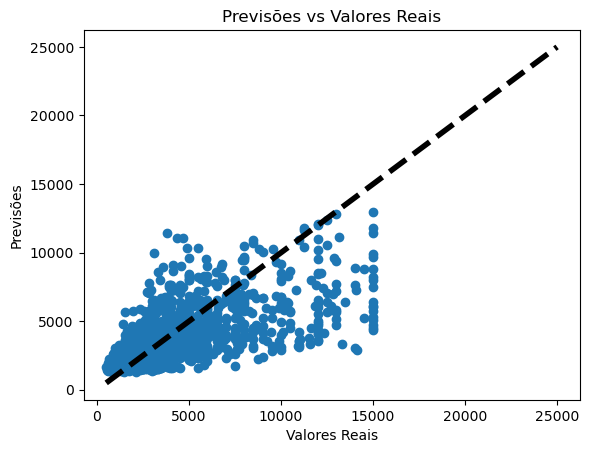

C:\Users\milla\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


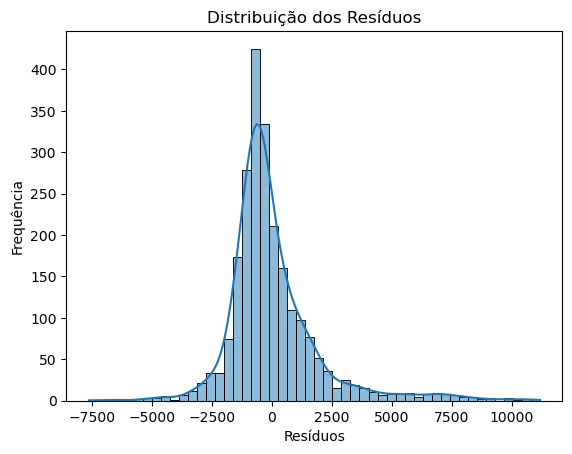

In [72]:
# Visualização das previsões vs valores reais
plt.scatter(y_test, y_pred)
plt.xlabel('Valores Reais')
plt.ylabel('Previsões')
plt.title('Previsões vs Valores Reais')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.show()

# Visualização dos resíduos
residuos = y_test - y_pred
sns.histplot(residuos, bins=50, kde=True)
plt.title('Distribuição dos Resíduos')
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.show()

> Diante destes gráficos podemos concluir que os erros de previsão do modelo estão distribuídos uniformemente ao longo dos valores previstos, sem viés sistemático.

## ***Simulação de valor de um aluguel aleatório***

In [73]:
# Fazendo previsões
# Exemplo de previsão para um novo imóvel
nova_area = 150  
novos_banheiros = 2  
nova_garagem = 1  

nova_entrada = [[nova_area, novos_banheiros, nova_garagem]]
previsao = modelo.predict(nova_entrada)

print(f"Previsão de preço de aluguel para o novo imóvel: R$ {previsao[0]:.2f}")

Previsão de preço de aluguel para o novo imóvel: R$ 4816.91


C:\Users\milla\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## *6. Conclusões e sugestões de melhoria*:

> A partir da análise acima pode-se concluir que:

1. A relação entre o número de banheiros e garagem não tem uma relação direta com o preço do aluguel, apesar de no ato da compra poder fazer diferença na escolha pelo comprador. 
Em relação a área, pode-se perceber a maior concentração de imóveis com áreas inferiores à 100m² e aluguéis abaixo de R$ 5000,00. Porém não se pode concluir que quanto maior a área maior o valor do aluguel, afinal a localização do mesmo interfere diretamente.

2. Os bairros com maiores aluguéis são Jardim Tango e  Alphaville (um, dois, cinco e plus). E menores são Jardim Jaçanã, Jardim Inga e Jardim Frei Galvão.


3. Os bairros com maior número de imóveis em aluguel são: Bela vista, Vila Mariana e Jardim Paulista. Pode-se perceber que estes ficam localizados ao sul da região do Centro e ao norte da região Sul, sendo todos limites entre si.

4. O tipo de aluguel mais oferecido no mercado é apartamento com 64% dos casos.

5. Maior quantidade de imóveis ofertados se encontra até R$5 mil.
6. 
Em relação aos tipos de aluguéis: 
a) Casas em condomínio apresentam os maiores preços de aluguel, enquanto Apartamentos e Casas são relativamente parecidos.
b) A área dos apartamentos é substancialmente menor que as casas.
c) Quanto ao número de banheiros e vagas na garagem mantém-se que casas oferecem um número maior em ambos os casos.
d) O preço do aluguel de um apartamento é relativamente mais alto comparado com uma casa com o mesmo número de banheiros, vagas de garagem e até área. Mas o motivo não fica claro, poderia ser devido à localização ou aos demais serviços oferecidos em um condomínio de prédio.

6. Ao se fazer uma simulação de preço de um novo imóvel se considerou que a área seria 150m², o imóvel teria 2 banheiros e 1 garagem. E chegou à conclusão de que o preço de aluguel para o novo imóvel seria de R$ 4816,91.

7. Em relação as melhorias, seria válido considerar incluir outras variáveis que possam influenciar o preço do aluguel, como a localização, proximidade de serviços e infraestrutura, idade do imóvel, entre outros.

8. Também é possível notar que apenas o modelo de regressão linear não é o mais eficaz nesse caso, provavelmente com a utilização de modelos mais complexos como árvore de decisão ou modelos de aprendizagem de máquina podem capturar relações lineares entre variáveis melhore a precisão da análise.

